<a href="https://colab.research.google.com/github/rynwhd/Language-Models/blob/main/ANN_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


--2023-03-25 00:56:20--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M   155KB/s    in 29s     

2023-03-25 00:56:49 (172 KB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

In [3]:
df=pd.read_csv('bbc_text_cls.csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
df['labels'].astype('category').cat.codes #for tf we need to specify from 0 to K-1

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [7]:
df['targets']=df['labels'].astype('category').cat.codes

In [8]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [11]:
tfidf=TfidfVectorizer(stop_words='english')
Xtrain=tfidf.fit_transform(df_train['text'])
Xtest=tfidf.transform(df_test['text'])

In [12]:
Ytrain=df_train['targets']
Ytest=df_test['targets']

In [15]:
K=df['targets'].max()+1
K #no of classes or target classes

5

In [21]:
D=Xtrain.shape[1]

In [26]:
i=Input(shape=(D,))
x=Dense(300,activation='relu')(i) #100 is arbitrary value
x=Dense(K)(x) #we will be using softmax activation in the loss
model=Model(i,x)

In [27]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 24932)]           0         
                                                                 
 dense_4 (Dense)             (None, 300)               7479900   
                                                                 
 dense_5 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,481,405
Trainable params: 7,481,405
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
#data to tf must not by sparse
Xtrain=Xtrain.toarray()
Xtest=Xtest.toarray()

In [34]:
r=model.fit(
    Xtrain,Ytrain,
    validation_data=(Xtest,Ytest),
    epochs=7,
    batch_size=128
            )

Epoch 1/7
13/13 [==============================] - 3s 140ms/step - loss: 1.4612 - accuracy: 0.8471 - val_loss: 1.1870 - val_accuracy: 0.9566
Epoch 2/7
13/13 [==============================] - 2s 151ms/step - loss: 0.9068 - accuracy: 0.9936 - val_loss: 0.7303 - val_accuracy: 0.9731
Epoch 3/7
13/13 [==============================] - 2s 119ms/step - loss: 0.4450 - accuracy: 0.9968 - val_loss: 0.4197 - val_accuracy: 0.9701
Epoch 4/7
13/13 [==============================] - 1s 116ms/step - loss: 0.1963 - accuracy: 0.9987 - val_loss: 0.2679 - val_accuracy: 0.9686
Epoch 5/7
13/13 [==============================] - 1s 114ms/step - loss: 0.0943 - accuracy: 0.9994 - val_loss: 0.2005 - val_accuracy: 0.9731
Epoch 6/7
13/13 [==============================] - 1s 116ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 0.1676 - val_accuracy: 0.9731
Epoch 7/7
13/13 [==============================] - 2s 150ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 0.9746


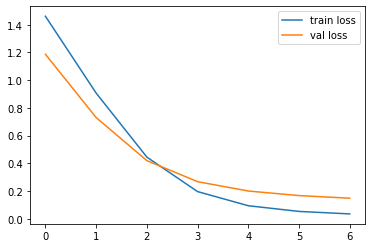

In [35]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()

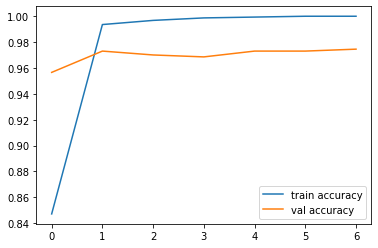

In [36]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()

<Axes: >

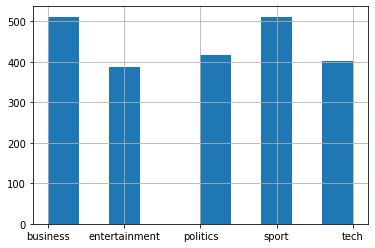

In [37]:
df['labels'].hist()

AttributeError: ignored